<a href="https://colab.research.google.com/github/FluWieland/FluWieland.github.io/blob/master/ProofOfConcept_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle example
Very simple architecture and unbalanced dataset


https://www.kaggle.com/datasets/gracehephzibahm/animal-disease

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

ValueError: mount failed

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


In [ ]:
df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


In [ ]:
df.describe()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
count,871,871,871,871,871,871,869
unique,46,232,230,229,217,203,2
top,Buffaloes,Fever,Diarrhea,Coughing,Weight loss,Pains,Yes
freq,129,257,119,95,117,99,849


In [ ]:
df.isna().sum()

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                384       
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
22/22 [

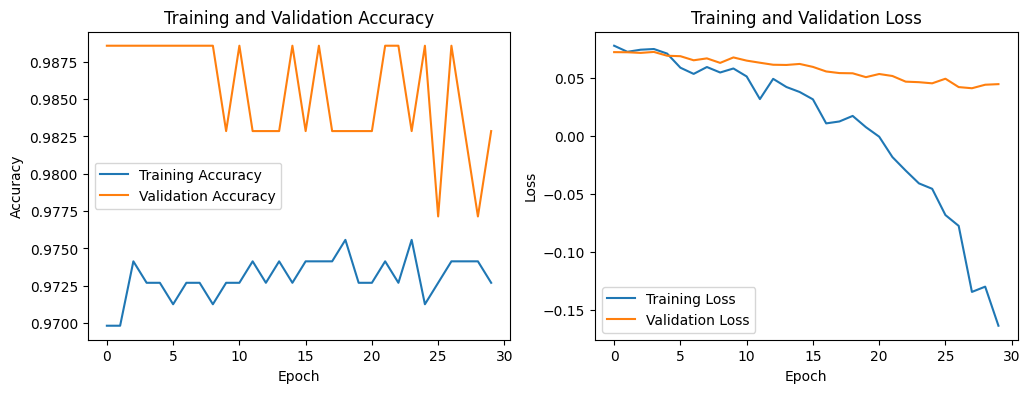

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

for col in df.columns :
    if df[col].dtypes =='object' :
        enc  = LabelEncoder()
        enc.fit(df[col].astype(str))
        df[f'{col}_'] = enc.transform(df[col].astype(str))
        df.drop([col],axis=1, inplace=True)

df.columns = ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5', 'Dangerous']

X = df.drop(['AnimalName','Dangerous'], axis=1)
y = df['Dangerous']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Accuracy on test set: {accuracy}')

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))

# График точности
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# График функции потерь
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#AI enhanced version of the kaggle model, with better outcome in the loss plots


**Regularization**: Added L2 regularization (kernel_regularizer=l2(0.001)) to the Dense layers to prevent overfitting.

**Early Stopping**: Included an early stopping callback to halt training when the validation loss stops improving.

**Extended Training**: Increased the number of epochs to 100 to allow the early stopping to work effectively. The patience parameter is set to 10 to stop training if there is no improvement in validation loss for 10 consecutive epochs.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Encoding categorical features
for col in df.columns:
    if df[col].dtypes == 'object':
        enc = LabelEncoder()
        df[f'{col}_'] = enc.fit_transform(df[col].astype(str))
        df.drop([col], axis=1, inplace=True)

df.columns = ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5', 'Dangerous']

X = df.drop(['AnimalName', 'Dangerous'], axis=1)
y = df['Dangerous']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Building the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluating the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Accuracy on test set: {accuracy}')

# Plotting the results
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


NameError: name 'df' is not defined

Trying to evaluate further the results better and SMOTE

In [ ]:
#!pip uninstall scikit-learn -y
#!pip uninstall imbalanced-learn -y

#!pip install scikit-learn==1.0.2
#!pip install imbalanced-learn==0.8.1
#!pip install scikeras

!pip install scikit-learn
!pip install imbalanced-learn
!pip install scikeras
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.7 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/u

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df=pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/data.csv')
df=pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/clean-data.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = df
data.isna().sum()

Animal       0
Symptom 1    0
Symptom 2    0
Symptom 3    0
Symptom 4    0
Symptom 5    0
Dangerous    0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Assuming df is your dataframe
# Encoding categorical features
for col in df.columns:
    if df[col].dtypes == 'object':
        enc = LabelEncoder()
        df[f'{col}_'] = enc.fit_transform(df[col].astype(str))
        df.drop([col], axis=1, inplace=True)

df.columns = ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5', 'Dangerous']

X = df.drop(['AnimalName', 'Dangerous'], axis=1)
y = df['Dangerous']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Addressing class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Building the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_model()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluating the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Accuracy on test set: {accuracy}')

# Predict on the test set
y_test_pred_probs = model.predict(X_test)
y_test_pred = (y_test_pred_probs > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plotting the results
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()




NameError: name 'df' is not defined

Now evaluation with a confusion matrix and also SMOTE oversampling


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_test_pred_probs = model.predict(X_test)
y_test_pred = (y_test_pred_probs > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Now further evaluation with cross validation:

In [ ]:
!pip install pandas seaborn matplotlib #scikit-learn tensorflow scikeras imbalanced-learn

# Uninstall conflicting versions of libraries
!pip uninstall keras tensorflow scikeras scikit-learn imbalanced-learn -y

# Install compatible versions of libraries
!pip install tensorflow==2.15.0 keras==2.15.0 scikeras==0.11.0 scikit-learn==1.0.2 imbalanced-learn==0.8.1

# Verify the installed versions
!pip show keras tensorflow scikeras scikit-learn imbalanced-learn

Found existing installation: keras 3.4.1
Uninstalling keras-3.4.1:
  Successfully uninstalled keras-3.4.1
Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: scikeras 0.13.0
Uninstalling scikeras-0.13.0:
  Successfully uninstalled scikeras-0.13.0
Found existing installation: scikit-learn 1.5.0
Uninstalling scikit-learn-1.5.0:
  Successfully uninstalled scikit-learn-1.5.0
Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.7/189.7 kB 20.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packa

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow
---
Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
---
Name: scikeras
Version: 0.11.0
Summary: Scikit-Learn API wrapper for Keras.
Home-page: https://github.com/adriangb/scikeras
Author: Adrian Garcia Badaracco

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/')

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
# df=pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/data.csv')
df=pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/clean-data.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df.head()

,Animal,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Dangerous
0,dog,fever,diarrhoea,vomit,weight loss,dehydration,yes
1,dog,fever,diarrhoea,cough,tiredness,pain,yes
2,dog,fever,diarrhoea,cough,vomit,anorexia,yes
3,dog,fever,breathing difficulty,cough,lethargy,sneering,yes
4,dog,fever,diarrhoea,cough,lethargy,blue eye,yes


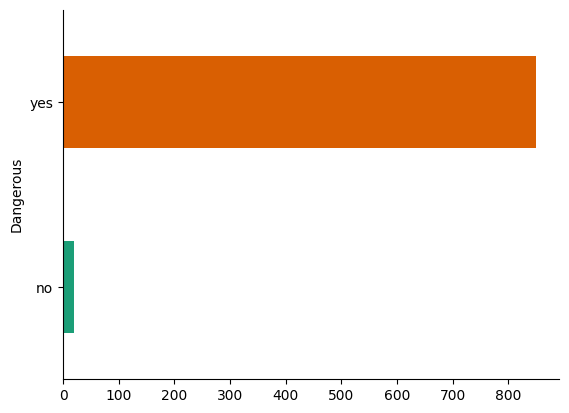

In [ ]:
# @title Dangerous

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Dangerous').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#without SMOTE

Mounted at /content/drive/
Columns after encoding: Index(['Animal_', 'Symptom 1_', 'Symptom 2_', 'Symptom 3_', 'Symptom 4_',
       'Symptom 5_', 'Dangerous_'],
      dtype='object')
Cross-validation scores: [0.97701149 0.97701149 0.97701149 0.97701149 0.97687861]
Mean cross-validation score: 0.9769849179456515
Epoch 1/100
22/22 [==============================] - 2s 23ms/step - loss: 0.6477 - accuracy: 0.8619 - val_loss: 0.3362 - val_accuracy: 0.9885
Epoch 2/100
22/22 [==============================] - 0s 8ms/step - loss: 0.2731 - accuracy: 0.9741 - val_loss: 0.2121 - val_accuracy: 0.9885
Epoch 3/100
22/22 [==============================] - 0s 7ms/step - loss: 0.2609 - accuracy: 0.9741 - val_loss: 0.1921 - val_accuracy: 0.9885
Epoch 4/100
22/22 [==============================] - 0s 8ms/step - loss: 0.2306 - accuracy: 0.9741 - val_loss: 0.1803 - val_accuracy: 0.9885
Epoch 5/100
22/22 [==============================] - 0s 8ms/step - loss: 0.2125 - accuracy: 0.9741 - val_loss: 0.1656 - va

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


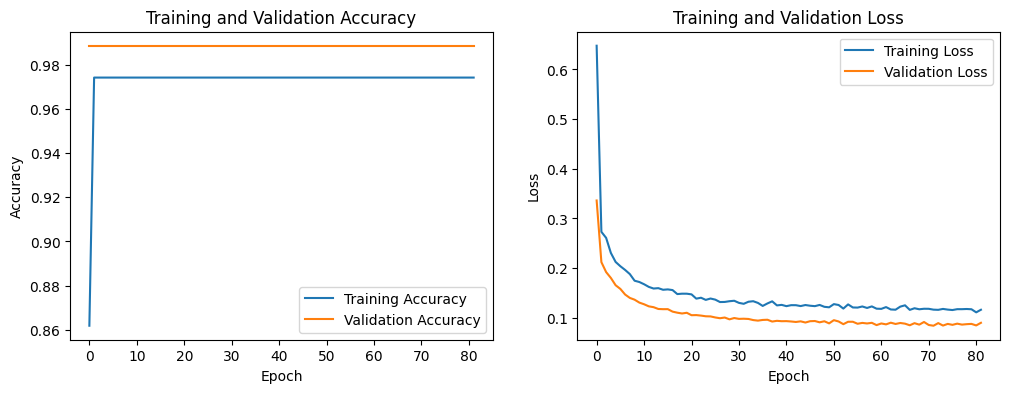

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/clean-data.csv')

# Encoding categorical features
for col in df.columns:
    if df[col].dtypes == 'object':
        enc = LabelEncoder()
        df[f'{col}_'] = enc.fit_transform(df[col].astype(str))
        df.drop([col], axis=1, inplace=True)

# Print the columns to debug
print("Columns after encoding:", df.columns)

# Rename the columns as per the new DataFrame structure
df.columns = ['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5', 'symptoms6', 'Dangerous']

X = df.drop(['Dangerous'], axis=1)
y = df['Dangerous']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Building the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrapping the model with KerasClassifier
wrapped_model = KerasClassifier(model=create_model, epochs=100, batch_size=32, verbose=0)

# Performing cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(wrapped_model, X_scaled, y_encoded, cv=kfold)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Training the model with early stopping
model = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluating the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Accuracy on test set: {accuracy}')

# Predict on the test set
y_test_pred_probs = model.predict(X_test)
y_test_pred = (y_test_pred_probs > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plotting the results
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


#with SMOTE

Mounted at /content/drive/
Columns after encoding: Index(['Animal_', 'Symptom 1_', 'Symptom 2_', 'Symptom 3_', 'Symptom 4_',
       'Symptom 5_', 'Dangerous_'],
      dtype='object')
Cross-validation scores: [0.99705882 0.99117647 0.98823529 0.99410029 0.96460177]
Mean cross-validation score: 0.9870345306264099
Epoch 1/100
43/43 [==============================] - 2s 13ms/step - loss: 0.8219 - accuracy: 0.6502 - val_loss: 0.7599 - val_accuracy: 0.7676
Epoch 2/100
43/43 [==============================] - 0s 7ms/step - loss: 0.7293 - accuracy: 0.7150 - val_loss: 0.6840 - val_accuracy: 0.7265
Epoch 3/100
43/43 [==============================] - 0s 8ms/step - loss: 0.6627 - accuracy: 0.7209 - val_loss: 0.6224 - val_accuracy: 0.7794
Epoch 4/100
43/43 [==============================] - 0s 6ms/step - loss: 0.6022 - accuracy: 0.7555 - val_loss: 0.5675 - val_accuracy: 0.7971
Epoch 5/100
43/43 [==============================] - 0s 6ms/step - loss: 0.5555 - accuracy: 0.7828 - val_loss: 0.5174 - va

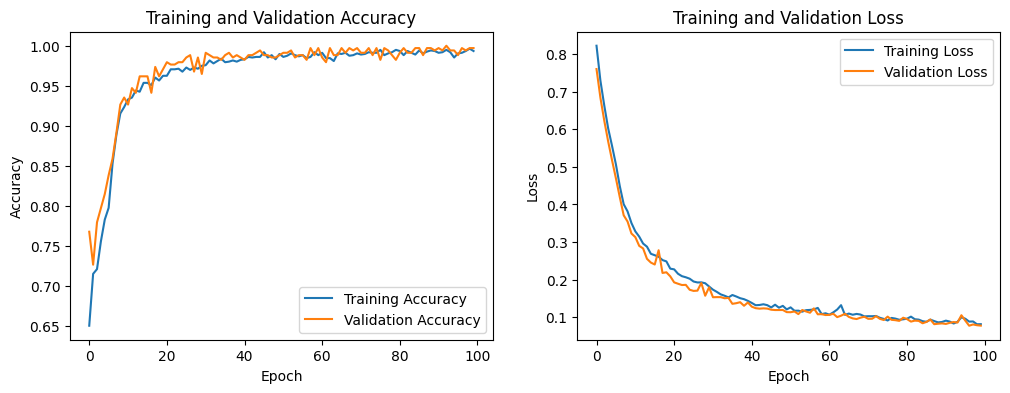

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/clean-data.csv')

# Encoding categorical features
for col in df.columns:
    if df[col].dtypes == 'object':
        enc = LabelEncoder()
        df[f'{col}_'] = enc.fit_transform(df[col].astype(str))
        df.drop([col], axis=1, inplace=True)

# Print the columns to debug
print("Columns after encoding:", df.columns)

# Rename the columns as per the new DataFrame structure
df.columns = ['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5', 'symptoms6', 'Dangerous']

X = df.drop(['Dangerous'], axis=1)
y = df['Dangerous']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Building the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrapping the model with KerasClassifier
wrapped_model = KerasClassifier(model=create_model, epochs=100, batch_size=32, verbose=0)

# Performing cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(wrapped_model, X_resampled, y_resampled, cv=kfold)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Training the model with early stopping
model = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluating the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Accuracy on test set: {accuracy}')

# Predict on the test set
y_test_pred_probs = model.predict(X_test)
y_test_pred = (y_test_pred_probs > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plotting the results
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# confirming the difference is due to SMOTE

Epoch 1/100
22/22 [==============================] - 1s 15ms/step - loss: 0.5535 - accuracy: 0.9669 - val_loss: 0.2754 - val_accuracy: 0.9885
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2712 - accuracy: 0.9741 - val_loss: 0.2047 - val_accuracy: 0.9885
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2450 - accuracy: 0.9741 - val_loss: 0.1855 - val_accuracy: 0.9885
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.2290 - accuracy: 0.9741 - val_loss: 0.1694 - val_accuracy: 0.9885
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2119 - accuracy: 0.9741 - val_loss: 0.1579 - val_accuracy: 0.9885
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1934 - accuracy: 0.9741 - val_loss: 0.1480 - val_accuracy: 0.9885
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1789 - accuracy: 0.9741 - val_loss: 0.1406 - val_accuracy: 0.9885
Epoch 8/100


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


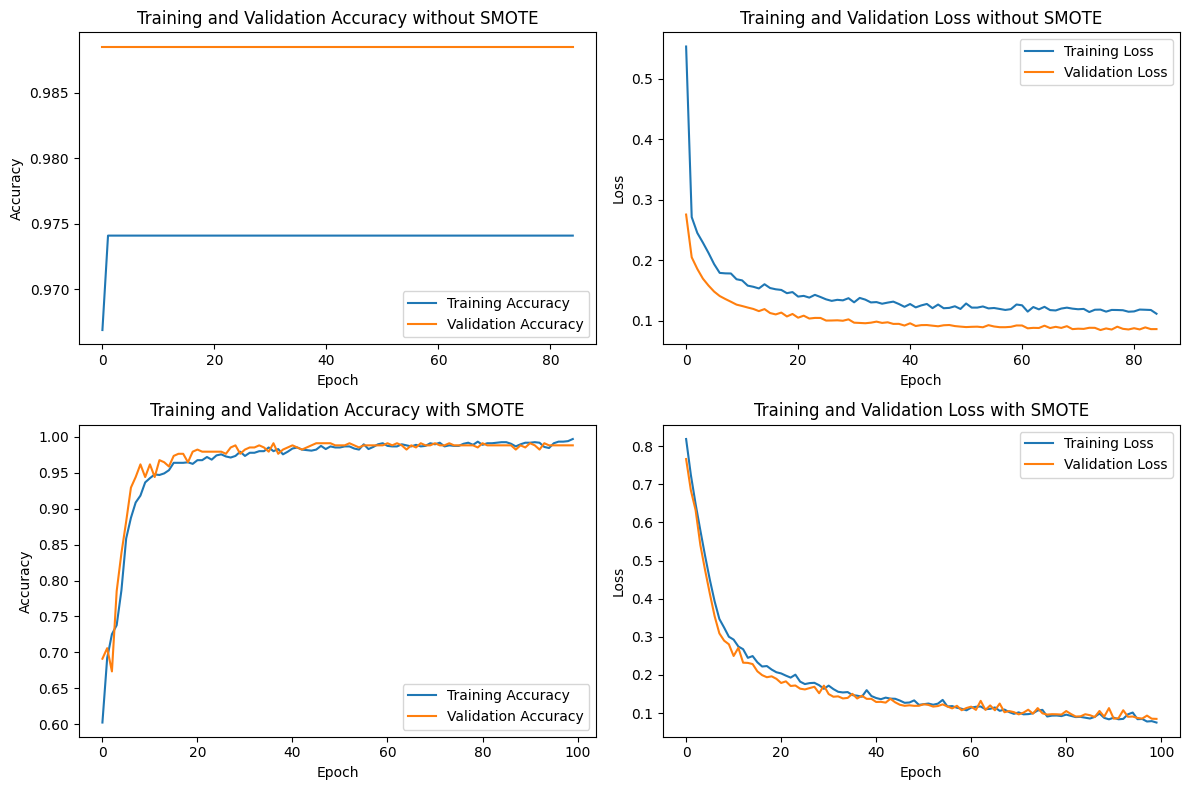

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import random

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Load the dataset
#df = pd.read_csv('/mnt/data/clean-data.csv')

# Encoding categorical features
for col in df.columns:
    if df[col].dtypes == 'object':
        enc = LabelEncoder()
        df[f'{col}_'] = enc.fit_transform(df[col].astype(str))
        df.drop([col], axis=1, inplace=True)

# Rename the columns as per the new DataFrame structure
df.columns = ['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5', 'symptoms6', 'Dangerous']

X = df.drop(['Dangerous'], axis=1)
y = df['Dangerous']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

# Splitting data into training and test sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Training the model without SMOTE
model_no_smote = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_no_smote = model_no_smote.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Training the model with SMOTE
model_smote = create_model()
history_smote = model_smote.fit(X_train_smote, y_train_smote, epochs=100, batch_size=32, validation_data=(X_test_smote, y_test_smote), callbacks=[early_stopping])

# Evaluating both models
accuracy_no_smote = model_no_smote.evaluate(X_test, y_test)[1]
accuracy_smote = model_smote.evaluate(X_test_smote, y_test_smote)[1]

print(f'Accuracy without SMOTE: {accuracy_no_smote}')
print(f'Accuracy with SMOTE: {accuracy_smote}')

# Predict on the test set without SMOTE
y_test_pred_probs_no_smote = model_no_smote.predict(X_test)
y_test_pred_no_smote = (y_test_pred_probs_no_smote > 0.5).astype("int32")

# Predict on the test set with SMote
y_test_pred_probs_smote = model_smote.predict(X_test_smote)
y_test_pred_smote = (y_test_pred_probs_smote > 0.5).astype("int32")

# Confusion matrix without SMOTE
cm_no_smote = confusion_matrix(y_test, y_test_pred_no_smote)
print("Confusion Matrix without SMOTE:")
print(cm_no_smote)

# Confusion matrix with SMOTE
cm_smote = confusion_matrix(y_test_smote, y_test_pred_smote)
print("Confusion Matrix with SMOTE:")
print(cm_smote)

# Classification report without SMOTE
print("Classification Report without SMOTE:")
print(classification_report(y_test, y_test_pred_no_smote))

# Classification report with SMOTE
print("Classification Report with SMOTE:")
print(classification_report(y_test_smote, y_test_pred_smote))

# Plotting the results
accuracy_no_smote = history_no_smote.history['accuracy']
val_accuracy_no_smote = history_no_smote.history['val_accuracy']
loss_no_smote = history_no_smote.history['loss']
val_loss_no_smote = history_no_smote.history['val_loss']

accuracy_smote = history_smote.history['accuracy']
val_accuracy_smote = history_smote.history['val_accuracy']
loss_smote = history_smote.history['loss']
val_loss_smote = history_smote.history['val_loss']

plt.figure(figsize=(12, 8))

# Plotting accuracy without SMOTE
plt.subplot(2, 2, 1)
plt.plot(accuracy_no_smote, label='Training Accuracy')
plt.plot(val_accuracy_no_smote, label='Validation Accuracy')
plt.title('Training and Validation Accuracy without SMOTE')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss without SMOTE
plt.subplot(2, 2, 2)
plt.plot(loss_no_smote, label='Training Loss')
plt.plot(val_loss_no_smote, label='Validation Loss')
plt.title('Training and Validation Loss without SMOTE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy with SMOTE
plt.subplot(2, 2, 3)
plt.plot(accuracy_smote, label='Training Accuracy')
plt.plot(val_accuracy_smote, label='Validation Accuracy')
plt.title('Training and Validation Accuracy with SMOTE')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss with SMOTE
plt.subplot(2, 2, 4)
plt.plot(loss_smote, label='Training Loss')
plt.plot(val_loss_smote, label='Validation Loss')
plt.title('Training and Validation Loss with SMOTE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#ensuring comprehensive cross validation over multiple folds

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import random

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Load the dataset
#df = pd.read_csv('/mnt/data/clean-data.csv')

# Encoding categorical features
for col in df.columns:
    if df[col].dtypes == 'object':
        enc = LabelEncoder()
        df[f'{col}_'] = enc.fit_transform(df[col].astype(str))
        df.drop([col], axis=1, inplace=True)

# Rename the columns as per the new DataFrame structure
df.columns = ['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5', 'symptoms6', 'Dangerous']

X = df.drop(['Dangerous'], axis=1)
y = df['Dangerous']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

# Define the model creation function
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize variables to accumulate results
acc_scores = []
conf_matrices = []
class_reports = []

# Perform cross-validation with SMOTE
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_index, test_index in kfold.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]

    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

    # Evaluate the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    acc_scores.append(scores[1])

    # Predict on the test set
    y_test_pred_probs = model.predict(X_test)
    y_test_pred = (y_test_pred_probs > 0.5).astype("int32")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    conf_matrices.append(cm)

    # Classification report
    report = classification_report(y_test, y_test_pred, output_dict=True)
    class_reports.append(report)

# Average accuracy score
mean_acc = np.mean(acc_scores)
print(f'Mean cross-validation accuracy: {mean_acc}')

# Average confusion matrix
avg_cm = np.mean(conf_matrices, axis=0)
print("Average Confusion Matrix:")
print(avg_cm)

# Average classification report
avg_class_report = {
    "precision": np.mean([report['weighted avg']['precision'] for report in class_reports]),
    "recall": np.mean([report['weighted avg']['recall'] for report in class_reports]),
    "f1-score": np.mean([report['weighted avg']['f1-score'] for report in class_reports])
}
print("Average Classification Report:")
print(avg_class_report)


11/11 [==============================] - 0s 2ms/step
Mean cross-validation accuracy: 0.9852750182151795
Average Confusion Matrix:
[[169.4   0.4]
 [  4.6 165.2]]
Average Classification Report:
{'precision': 0.9856905635574007, 'recall': 0.9852750303661286, 'f1-score': 0.9852702798079204}


#direct implementation with user interaction, predicting danger

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/clean-data.csv')

## **this one finally works!!!**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5161 - loss: 0.8489 - val_accuracy: 0.6471 - val_loss: 0.7717
Epoch 2/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7086 - loss: 0.7381 - val_accuracy: 0.7794 - val_loss: 0.6424
Epoch 3/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8592 - loss: 0.5673 - val_accuracy: 0.8500 - val_loss: 0.4698
Epoch 4/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9108 - loss: 0.3965 - val_accuracy: 0.9029 - val_loss: 0.3532
Epoch 5/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9370 - loss: 0.3269 - val_accuracy: 0.9029 - val_loss: 0.3206
Epoch 6/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9365 - loss: 0.2840 - val_accuracy: 0.9294 - val_loss: 0.2930
Epoch 7/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9500 - loss: 0.2677 - val_accuracy: 0.9353 - val_loss: 0.2789
Epoch 8/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9511 - loss: 0.2541 - val_accuracy: 0.9324 - v

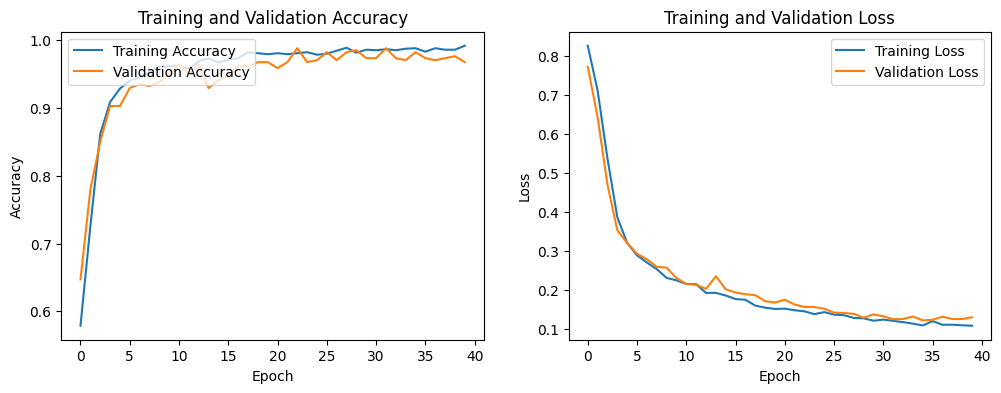

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/clean-data.csv')

# Extract unique symptom values from each symptom column and display them
symptom_columns = df.columns[1:-1]  # Exclude the 'Animal' and 'Dangerous' column

# Create a mapping from symptom names to numeric IDs for each symptom column
symptom_id_mapping = {col: {v.lower(): i+1 for i, v in enumerate(df[col].dropna().unique())} for col in symptom_columns}

# Extract the unique animals
unique_animals = df['Animal'].str.lower().unique()

# Create a mapping of animals to their possible symptoms based on the file
animal_symptom_mapping = {}
for animal in unique_animals:
    animal_symptom_mapping[animal] = {
        col: list(df[df['Animal'].str.lower() == animal][col].dropna().str.lower().unique())
        for col in symptom_columns
    }

# Encode categorical features based on the unique symptoms
encoded_df = df.copy()
for col in symptom_columns:
    encoded_df[col] = encoded_df[col].astype(str).map(lambda x: symptom_id_mapping[col].get(x.lower(), np.nan))

X = encoded_df.drop(['Animal', 'Dangerous'], axis=1)
y = encoded_df['Dangerous']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

# Splitting data into training and test sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Training the model with SMOTE
model_smote = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_smote = model_smote.fit(X_train_smote, y_train_smote, epochs=200, batch_size=32, validation_data=(X_test_smote, y_test_smote), callbacks=[early_stopping])

# Function to predict danger based on symptoms
def predict_danger():
    try:
        animal = input("Please enter the animal type: ").strip().lower()

        if animal not in animal_symptom_mapping:
            raise ValueError(f"Animal '{animal}' not recognized. Available animals: {list(animal_symptom_mapping.keys())}")

        symptoms_input = np.zeros(len(symptom_columns))
        for i, col in enumerate(symptom_columns):
            available_symptoms = animal_symptom_mapping[animal][col]
            if available_symptoms:
                print(f"Please select a symptom from {col}:")
                for symptom in available_symptoms:
                    print(f"- {symptom}")

                symptom = input(f"Enter the symptom for {col}: ").strip().lower()
                if symptom in available_symptoms:
                    symptoms_input[i] = symptom_id_mapping[col][symptom]
                else:
                    raise ValueError(f"Symptom '{symptom}' not recognized for {animal}. Available symptoms: {available_symptoms}")
            else:
                symptoms_input[i] = 0  # If no available symptoms for the column, default to 0

        # Scale the input array
        input_array_scaled = scaler.transform([symptoms_input])

        # Predict with the model
        prediction_prob = model_smote.predict(input_array_scaled)
        prediction = (prediction_prob > 0.5).astype("int32")

        if prediction[0] == 1:
            print(f"The {animal} is in danger based on the symptoms provided.")
        else:
            print(f"The {animal} is not in danger based on the symptoms provided.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Assuming you have the history object from the model training
history = history_smote

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

plt.show()


In [ ]:
# Run the prediction function
predict_danger()

Please enter the animal type: Dog
Please select a symptom from Symptom 1:
- fever
- ulcer
- facial swelling
- swelling on leg
- short term lethargy
- swollen lymph nodes
- diarrhoea with mucus
- strong cough
- lesions in the nasal cavity
- hair loss
- greenish yellow nasal discharge
- jaundice
- poor coat appearance
- watering
- straining
- upset stomach
- allergic reaction
- limping
- stop eating
Enter the symptom for Symptom 1: fever
Please select a symptom from Symptom 2:
- diarrhoea
- breathing difficulty
- bloody droop
- painful
- decreased appetite
- walking difficulty
- chronic eye inflammation
- swelling of face or leg
- tensemus
- funny nose
- inflamed eye
- lesions on nose
- dandruff
- lack of pigmentation
- pneumonia
- no pp
- anoxeria
- wilmot run to jump
- stop drinking
Enter the symptom for Symptom 2: diarrhoea
Please select a symptom from Symptom 3:
- vomit
- cough
- seizures
- decreased appetite
- foul breath
- thrust and privation
- nasal discharge
- weakness in the ba

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


The dog is in danger based on the symptoms provided.


##Trying to suppress additional warning due to SMOTE

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8152 - loss: 0.7427 - val_accuracy: 0.9885 - val_loss: 0.3549
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9813 - loss: 0.3180 - val_accuracy: 0.9885 - val_loss: 0.2131
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9832 - loss: 0.2342 - val_accuracy: 0.9885 - val_loss: 0.1881
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9704 - loss: 0.2615 - val_accuracy: 0.9885 - val_loss: 0.1760
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9785 - loss: 0.2063 - val_accuracy: 0.9885 - val_loss: 0.1570
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9717 - loss: 0.2123 - val_accuracy: 0.9885 - val_loss: 0.1465
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9677 - loss: 0.2152 - val_accuracy: 0.9885 - val_loss: 0.1365
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9803 - loss: 0.1679 - val_accuracy: 0.9885 - val_loss: 0.

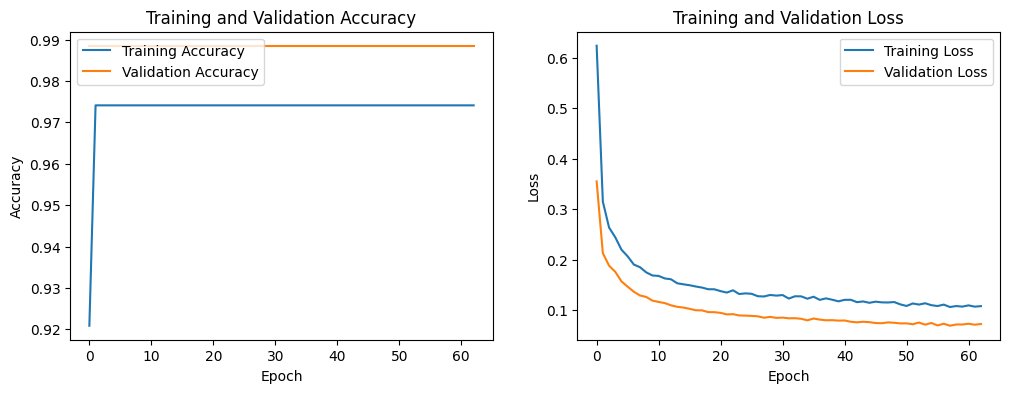

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/clean-data.csv')

# Remove rows with missing symptoms
df = df.dropna(subset=df.columns[1:-1])

# Extract unique symptom values from each symptom column and display them
symptom_columns = df.columns[1:-1]  # Exclude the 'Animal' and 'Dangerous' column

# Create a mapping from symptom names to numeric IDs for each symptom column
symptom_id_mapping = {col: {v.lower(): i+1 for i, v in enumerate(df[col].dropna().unique())} for col in symptom_columns}

# Extract the unique animals
unique_animals = df['Animal'].str.lower().unique()

# Create a mapping of animals to their possible symptoms based on the file
animal_symptom_mapping = {}
for animal in unique_animals:
    animal_symptom_mapping[animal] = {
        col: list(df[df['Animal'].str.lower() == animal][col].dropna().str.lower().unique())
        for col in symptom_columns
    }

# Encode categorical features based on the unique symptoms
encoded_df = df.copy()
for col in symptom_columns:
    encoded_df[col] = encoded_df[col].astype(str).map(lambda x: symptom_id_mapping[col].get(x.lower(), np.nan))

X = encoded_df.drop(['Animal', 'Dangerous'], axis=1)
y = encoded_df['Dangerous']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Training the model
model = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Function to predict danger based on symptoms
def predict_danger():
    try:
        animal = input("Please enter the animal type: ").strip().lower()

        if animal not in animal_symptom_mapping:
            raise ValueError(f"Animal '{animal}' not recognized. Available animals: {list(animal_symptom_mapping.keys())}")

        symptoms_input = np.zeros(len(symptom_columns))
        for i, col in enumerate(symptom_columns):
            available_symptoms = animal_symptom_mapping[animal][col]
            if available_symptoms:
                print(f"Please select a symptom from {col}:")
                for symptom in available_symptoms:
                    print(f"- {symptom}")

                symptom = input(f"Enter the symptom for {col}: ").strip().lower()
                if symptom in available_symptoms:
                    symptoms_input[i] = symptom_id_mapping[col][symptom]
                else:
                    raise ValueError(f"Symptom '{symptom}' not recognized for {animal}. Available symptoms: {available_symptoms}")
            else:
                symptoms_input[i] = 0  # If no available symptoms for the column, default to 0

        # Scale the input array
        input_array_scaled = scaler.transform([symptoms_input])

        # Predict with the model
        prediction_prob = model.predict(input_array_scaled)
        prediction = (prediction_prob > 0.5).astype("int32")

        if prediction[0] == 1:
            print(f"The {animal} is in danger based on the symptoms provided.")
        else:
            print(f"The {animal} is not in danger based on the symptoms provided.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Assuming you have the history object from the model training
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

plt.show()


In [ ]:
# Run the prediction function
predict_danger()


Please enter the animal type: Dog
Please select a symptom from Symptom 1:
- fever
- ulcer
- facial swelling
- swelling on leg
- short term lethargy
- swollen lymph nodes
- diarrhoea with mucus
- strong cough
- lesions in the nasal cavity
- hair loss
- greenish yellow nasal discharge
- jaundice
- poor coat appearance
- watering
- straining
- upset stomach
- allergic reaction
- limping
- stop eating
Enter the symptom for Symptom 1: fever
Please select a symptom from Symptom 2:
- diarrhoea
- breathing difficulty
- bloody droop
- painful
- decreased appetite
- walking difficulty
- chronic eye inflammation
- swelling of face or leg
- tensemus
- funny nose
- inflamed eye
- lesions on nose
- dandruff
- lack of pigmentation
- pneumonia
- no pp
- anoxeria
- wilmot run to jump
- stop drinking
Enter the symptom for Symptom 2: diarrhoea
Please select a symptom from Symptom 3:
- vomit
- cough
- seizures
- decreased appetite
- foul breath
- thrust and privation
- nasal discharge
- weakness in the ba

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## implementation with working ML, SMOTE and interaction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/clean-data.csv')

# Remove rows with missing symptoms
df = df.dropna(subset=df.columns[1:-1])

# Extract unique symptom values from each symptom column and display them
symptom_columns = df.columns[1:-1]  # Exclude the 'Animal' and 'Dangerous' column

# Create a mapping from symptom names to numeric IDs for each symptom column
symptom_id_mapping = {col: {v.lower(): i+1 for i, v in enumerate(df[col].dropna().unique())} for col in symptom_columns}

# Extract the unique animals
unique_animals = df['Animal'].str.lower().unique()

# Create a mapping of animals to their possible symptoms based on the file
animal_symptom_mapping = {}
for animal in unique_animals:
    animal_symptom_mapping[animal] = {
        col: list(df[df['Animal'].str.lower() == animal][col].dropna().str.lower().unique())
        for col in symptom_columns
    }

# Encode categorical features based on the unique symptoms
encoded_df = df.copy()
for col in symptom_columns:
    encoded_df[col] = encoded_df[col].astype(str).map(lambda x: symptom_id_mapping[col].get(x.lower(), np.nan))

X = encoded_df.drop(['Animal', 'Dangerous'], axis=1)
y = encoded_df['Dangerous']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

# Splitting data into training and test sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Training the model with SMOTE
model_smote = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_smote = model_smote.fit(X_train_smote, y_train_smote, epochs=200, batch_size=32, validation_data=(X_test_smote, y_test_smote), callbacks=[early_stopping])

# Function to predict danger based on symptoms
def predict_danger():
    try:
        animal = input("Please enter the animal type: ").strip().lower()

        if animal not in animal_symptom_mapping:
            raise ValueError(f"Animal '{animal}' not recognized. Available animals: {list(animal_symptom_mapping.keys())}")

        symptoms_input = np.zeros(len(symptom_columns))
        for i, col in enumerate(symptom_columns):
            available_symptoms = animal_symptom_mapping[animal][col]
            if available_symptoms:
                print(f"Please select a symptom from {col}:")
                for symptom in available_symptoms:
                    print(f"- {symptom}")

                symptom = input(f"Enter the symptom for {col}: ").strip().lower()
                if symptom in available_symptoms:
                    symptoms_input[i] = symptom_id_mapping[col][symptom]
                else:
                    raise ValueError(f"Symptom '{symptom}' not recognized for {animal}. Available symptoms: {available_symptoms}")
            else:
                symptoms_input[i] = 0  # If no available symptoms for the column, default to 0

        # Scale the input array
        input_array_scaled = scaler.transform([symptoms_input])

        # Predict with the model
        prediction_prob = model_smote.predict(input_array_scaled)
        prediction = (prediction_prob > 0.5).astype("int32")

        if prediction[0] == 1:
            print(f"The {animal} is in danger based on the symptoms provided.")
        else:
            print(f"The {animal} is not in danger based on the symptoms provided.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Assuming you have the history object from the model training
history = history_smote

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

plt.show()


In [ ]:
predict_danger()

Please select a symptom from Symptom 1:
- fever
- ulcer
- facial swelling
- swelling on leg
- short term lethargy
- swollen lymph nodes
- diarrhoea with mucus
- strong cough
- lesions in the nasal cavity
- hair loss
- greenish yellow nasal discharge
- jaundice
- poor coat appearance
- watering
- straining
- upset stomach
- allergic reaction
- limping
- stop eating
Please select a symptom from Symptom 2:
- diarrhoea
- breathing difficulty
- bloody droop
- painful
- decreased appetite
- walking difficulty
- chronic eye inflammation
- swelling of face or leg
- tensemus
- funny nose
- inflamed eye
- lesions on nose
- dandruff
- lack of pigmentation
- pneumonia
- no pp
- anoxeria
- wilmot run to jump
- stop drinking


KeyboardInterrupt: Interrupted by user

# Now the same, but interpretable Machine Learning

In [9]:
os.getcwd()

'/content'

**Implement harmonic loss insted of cross entropy loss**


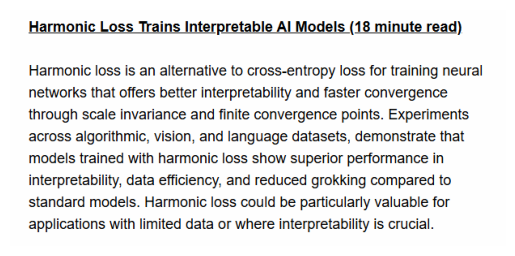

In [15]:
# Step 2: Load the image
from PIL import Image
import matplotlib.pyplot as plt

# Replace 'your_image_path_in_drive' with the actual path to your image in Google Drive
image_path = '/content/drive/MyDrive/Vettriage/ML_proof_of_concept/Screenshot 2025-02-05 152201.png'

# Open the image using PIL
image = Image.open(image_path)

# Step 3: Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

https://arxiv.org/abs/2502.01628

In [ ]:
!pip install shap

!pip install pandas seaborn matplotlib #scikit-learn tensorflow scikeras imbalanced-learn

# Uninstall conflicting versions of libraries
!pip uninstall keras tensorflow scikeras scikit-learn imbalanced-learn -y

# Install compatible versions of libraries
!pip install tensorflow==2.15.0 keras==2.15.0 scikeras==0.11.0 scikit-learn==1.0.2 imbalanced-learn==0.8.1

# Verify the installed versions
!pip show keras tensorflow scikeras scikit-learn imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.9 MB/s eta 0:00:00
Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0
Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.7/189.7 kB 22.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df=pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/data.csv')
df=pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/clean-data.csv')

Mounted at /content/drive/


In [ ]:
df.head(10)


,Animal,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Dangerous
0,dog,fever,diarrhoea,vomit,weight loss,dehydration,yes
1,dog,fever,diarrhoea,cough,tiredness,pain,yes
2,dog,fever,diarrhoea,cough,vomit,anorexia,yes
3,dog,fever,breathing difficulty,cough,lethargy,sneering,yes
4,dog,fever,diarrhoea,cough,lethargy,blue eye,yes
5,dog,fever,breathing difficulty,seizures,hyperaesthesia,sudden death,yes
6,dog,ulcer,diarrhoea,decreased appetite,tarry stool,enlarged lymph nodes,yes
7,dog,facial swelling,bloody droop,foul breath,decreased appetite,loosened teeth,yes
8,dog,fever,breathing difficulty,thrust and privation,weight loss,enlarged lymph nodes or swelling,yes
9,dog,swelling on leg,painful,nasal discharge,broken bones,nasal discharge,yes


Epoch 1/200
43/43 [==============================] - 1s 9ms/step - loss: 0.8251 - accuracy: 0.6031 - val_loss: 0.7763 - val_accuracy: 0.7118
Epoch 2/200
43/43 [==============================] - 0s 3ms/step - loss: 0.7214 - accuracy: 0.7504 - val_loss: 0.6590 - val_accuracy: 0.8059
Epoch 3/200
43/43 [==============================] - 0s 3ms/step - loss: 0.5562 - accuracy: 0.8454 - val_loss: 0.4999 - val_accuracy: 0.8559
Epoch 4/200
43/43 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.8873 - val_loss: 0.4176 - val_accuracy: 0.8794
Epoch 5/200
43/43 [==============================] - 0s 3ms/step - loss: 0.3607 - accuracy: 0.9035 - val_loss: 0.3647 - val_accuracy: 0.9059
Epoch 6/200
43/43 [==============================] - 0s 3ms/step - loss: 0.3270 - accuracy: 0.9242 - val_loss: 0.3386 - val_accuracy: 0.9118
Epoch 7/200
43/43 [==============================] - 0s 3ms/step - loss: 0.2958 - accuracy: 0.9337 - val_loss: 0.3253 - val_accuracy: 0.9176
Epoch 8/200
4

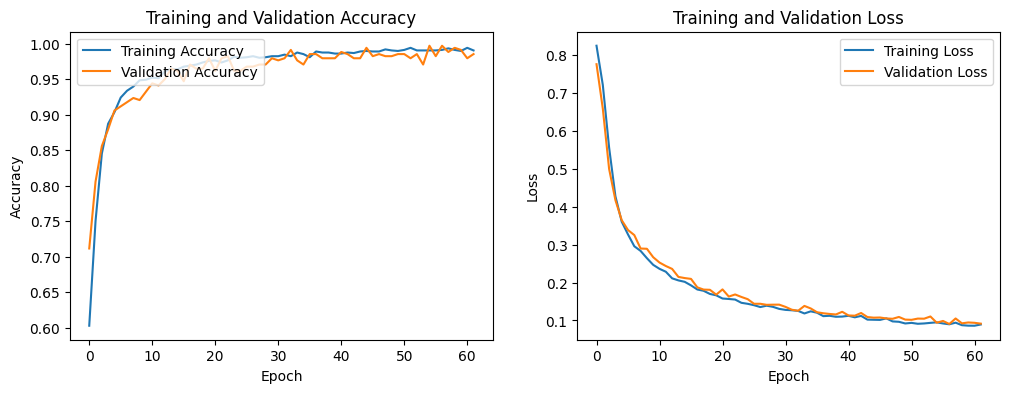

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping
import shap

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/clean-data.csv')

# Remove rows with missing symptoms
df = df.dropna(subset=df.columns[1:-1])

# Extract unique symptom values from each symptom column and display them
symptom_columns = df.columns[1:-1]  # Exclude the 'Animal' and 'Dangerous' column

# Create a mapping from symptom names to numeric IDs for each symptom column
symptom_id_mapping = {col: {v.lower(): i+1 for i, v in enumerate(df[col].dropna().unique())} for col in symptom_columns}

# Extract the unique animals
unique_animals = df['Animal'].str.lower().unique()

# Create a mapping of animals to their possible symptoms based on the file
animal_symptom_mapping = {}
for animal in unique_animals:
    animal_symptom_mapping[animal] = {
        col: list(df[df['Animal'].str.lower() == animal][col].dropna().str.lower().unique())
        for col in symptom_columns
    }

# Encode categorical features based on the unique symptoms
encoded_df = df.copy()
for col in symptom_columns:
    encoded_df[col] = encoded_df[col].astype(str).map(lambda x: symptom_id_mapping[col].get(x.lower(), np.nan))

X = encoded_df.drop(['Animal', 'Dangerous'], axis=1)
y = encoded_df['Dangerous']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

# Splitting data into training and test sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Training the model with SMOTE
model_smote = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_smote = model_smote.fit(X_train_smote, y_train_smote, epochs=200, batch_size=32, validation_data=(X_test_smote, y_test_smote), callbacks=[early_stopping])

# Function to predict danger based on symptoms and provide explanations
def predict_danger():
    try:
        animal = input("Please enter the animal type: ").strip().lower()

        if animal not in animal_symptom_mapping:
            raise ValueError(f"Animal '{animal}' not recognized. Available animals: {list(animal_symptom_mapping.keys())}")

        symptoms_input = np.zeros(len(symptom_columns))
        for i, col in enumerate(symptom_columns):
            available_symptoms = animal_symptom_mapping[animal][col]
            if available_symptoms:
                print(f"Please select a symptom from {col}:")
                for symptom in available_symptoms:
                    print(f"- {symptom}")

                symptom = input(f"Enter the symptom for {col}: ").strip().lower()
                if symptom in available_symptoms:
                    symptoms_input[i] = symptom_id_mapping[col][symptom]
                else:
                    raise ValueError(f"Symptom '{symptom}' not recognized for {animal}. Available symptoms: {available_symptoms}")
            else:
                symptoms_input[i] = 0  # If no available symptoms for the column, default to 0

        # Scale the input array
        input_array_scaled = scaler.transform([symptoms_input])

        # Predict with the model
        prediction_prob = model_smote.predict(input_array_scaled)
        prediction = (prediction_prob > 0.5).astype("int32")

        # Explain the prediction
        explainer = shap.DeepExplainer(model_smote, X_train_smote)
        shap_values = explainer.shap_values(input_array_scaled)

        if prediction[0] == 1:
            print(f"The {animal} is in danger based on the symptoms provided.")
        else:
            print(f"The {animal} is not in danger based on the symptoms provided.")

        # Display the SHAP values for the prediction
        shap.initjs()
        shap.force_plot(explainer.expected_value[0], shap_values[0], input_array_scaled, feature_names=symptom_columns)
    except Exception as e:
        print(f"An error occurred: {e}")

# Assuming you have the history object from the model training
history = history_smote

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

plt.show()


add confusion matrices and interpretation


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping
import shap

Epoch 1/200
43/43 [==============================] - 1s 7ms/step - loss: 0.8287 - accuracy: 0.5479 - val_loss: 0.7768 - val_accuracy: 0.6088
Epoch 2/200
43/43 [==============================] - 0s 6ms/step - loss: 0.7308 - accuracy: 0.6753 - val_loss: 0.6795 - val_accuracy: 0.7147
Epoch 3/200
43/43 [==============================] - 0s 6ms/step - loss: 0.6028 - accuracy: 0.8174 - val_loss: 0.5585 - val_accuracy: 0.8088
Epoch 4/200
43/43 [==============================] - 0s 5ms/step - loss: 0.4590 - accuracy: 0.8638 - val_loss: 0.4374 - val_accuracy: 0.8647
Epoch 5/200
43/43 [==============================] - 0s 6ms/step - loss: 0.3812 - accuracy: 0.8984 - val_loss: 0.3770 - val_accuracy: 0.9118
Epoch 6/200
43/43 [==============================] - 0s 4ms/step - loss: 0.3276 - accuracy: 0.9146 - val_loss: 0.3475 - val_accuracy: 0.8882
Epoch 7/200
43/43 [==============================] - 0s 6ms/step - loss: 0.3103 - accuracy: 0.9205 - val_loss: 0.3015 - val_accuracy: 0.9176
Epoch 8/200
4

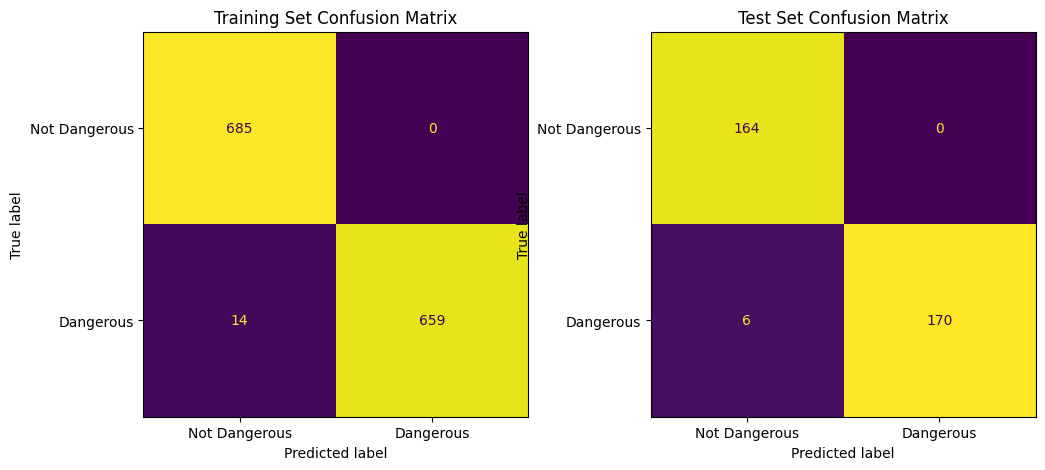

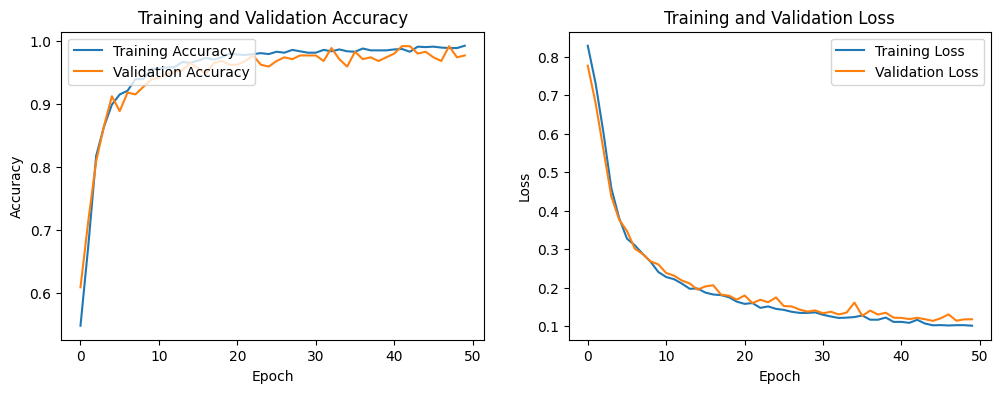

4/4 [==============================] - 0s 3ms/step


  0%|          | 0/340 [00:00<?, ?it/s]

94/94 [==============================] - 0s 1ms/step
Shape of X_test_smote: (340, 5)
Shape of shap_values: (340, 5, 1)
Symptom Columns: Index(['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'], dtype='object')
First row of X_test_smote: [0.48309179 0.50480769 0.00487805 0.48205128 0.04972376]
First row of shap_values: [-0.13486489]


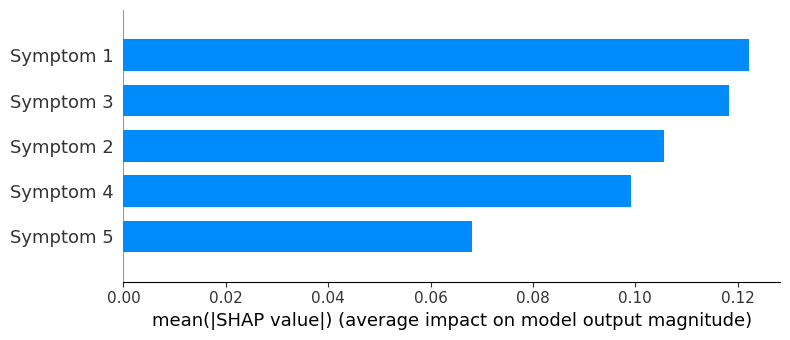

In [ ]:

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/clean-data.csv')

# Remove rows with missing symptoms
df = df.dropna(subset=df.columns[1:-1])

# Extract unique symptom values from each symptom column and display them
symptom_columns = df.columns[1:-1]  # Exclude the 'Animal' and 'Dangerous' column

# Create a mapping from symptom names to numeric IDs for each symptom column
symptom_id_mapping = {col: {v.lower(): i+1 for i, v in enumerate(df[col].dropna().unique())} for col in symptom_columns}

# Extract the unique animals
unique_animals = df['Animal'].str.lower().unique()

# Create a mapping of animals to their possible symptoms based on the file
animal_symptom_mapping = {}
for animal in unique_animals:
    animal_symptom_mapping[animal] = {
        col: list(df[df['Animal'].str.lower() == animal][col].dropna().str.lower().unique())
        for col in symptom_columns
    }

# Encode categorical features based on the unique symptoms
encoded_df = df.copy()
for col in symptom_columns:
    encoded_df[col] = encoded_df[col].astype(str).map(lambda x: symptom_id_mapping[col].get(x.lower(), np.nan))

X = encoded_df.drop(['Animal', 'Dangerous'], axis=1)
y = encoded_df['Dangerous']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

# Splitting data into training and test sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Training the model with SMOTE
model_smote = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_smote = model_smote.fit(X_train_smote, y_train_smote, epochs=200, batch_size=32, validation_data=(X_test_smote, y_test_smote), callbacks=[early_stopping])

# Evaluate the model
y_pred_train_smote = (model_smote.predict(X_train_smote) > 0.5).astype("int32")
y_pred_test_smote = (model_smote.predict(X_test_smote) > 0.5).astype("int32")

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
cm_train = confusion_matrix(y_train_smote, y_pred_train_smote)
cm_test = confusion_matrix(y_test_smote, y_pred_test_smote)
ConfusionMatrixDisplay(cm_train, display_labels=['Not Dangerous', 'Dangerous']).plot(ax=ax[0], colorbar=False)
ax[0].set_title('Training Set Confusion Matrix')
ConfusionMatrixDisplay(cm_test, display_labels=['Not Dangerous', 'Dangerous']).plot(ax=ax[1], colorbar=False)
ax[1].set_title('Test Set Confusion Matrix')
plt.show()

# Function to predict danger based on symptoms and provide explanations
def predict_danger():
    try:
        animal = input("Please enter the animal type: ").strip().lower()

        if animal not in animal_symptom_mapping:
            raise ValueError(f"Animal '{animal}' not recognized. Available animals: {list(animal_symptom_mapping.keys())}")

        symptoms_input = np.zeros(len(symptom_columns))
        for i, col in enumerate(symptom_columns):
            available_symptoms = animal_symptom_mapping[animal][col]
            if available_symptoms:
                print(f"Please select a symptom from {col}:")
                for symptom in available_symptoms:
                    print(f"- {symptom}")

                symptom = input(f"Enter the symptom for {col}: ").strip().lower()
                if symptom in available_symptoms:
                    symptoms_input[i] = symptom_id_mapping[col][symptom]
                else:
                    raise ValueError(f"Symptom '{symptom}' not recognized for {animal}. Available symptoms: {available_symptoms}")
            else:
                symptoms_input[i] = 0  # If no available symptoms for the column, default to 0

        # Scale the input array
        input_array_scaled = scaler.transform([symptoms_input])

        # Predict with the model
        prediction_prob = model_smote.predict(input_array_scaled)
        prediction = (prediction_prob > 0.5).astype("int32")

        # Explain the prediction
        explainer = shap.KernelExplainer(model_smote.predict, X_train_smote[:100])
        shap_values = explainer.shap_values(input_array_scaled)

        if prediction[0] == 1:
            print(f"The {animal} is in danger based on the symptoms provided.")
        else:
            print(f"The {animal} is not in danger based on the symptoms provided.")

        # Display the SHAP values for the prediction
        shap.initjs()
        shap.force_plot(explainer.expected_value, shap_values[0], input_array_scaled, feature_names=symptom_columns).show()
    except Exception as e:
        print(f"An error occurred: {e}")

# Generate SHAP plot for the test dataset
def generate_shap_summary():
    try:
        # Explain the model's predictions using SHAP
        explainer = shap.KernelExplainer(model_smote.predict, X_train_smote[:100])
        shap_values = explainer.shap_values(X_test_smote)

        # Print debug information
        print("Shape of X_test_smote:", X_test_smote.shape)
        print("Shape of shap_values:", np.array(shap_values).shape)
        print("Symptom Columns:", symptom_columns)
        print("First row of X_test_smote:", X_test_smote[0])
        print("First row of shap_values:", shap_values[0][0])

        # Reshape shap_values if needed
        shap_values = np.array(shap_values).reshape(X_test_smote.shape)

        # Plot SHAP summary plot for all features using a bar plot
        shap.initjs()
        shap.summary_plot(shap_values, X_test_smote, feature_names=symptom_columns, plot_type="bar")
    except Exception as e:
        print(f"An error occurred: {e}")

# Assuming you have the history object from the model training
history = history_smote

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

plt.show()

# Generate the SHAP summary plot
generate_shap_summary()


also including animal column

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/clean-data.csv')

# Remove rows with missing symptoms
df = df.dropna(subset=df.columns[1:-1])

# Extract unique symptom values from each symptom column and display them
symptom_columns = df.columns[1:-1]  # Exclude the 'Animal' and 'Dangerous' column

# Create a mapping from symptom names to numeric IDs for each symptom column
symptom_id_mapping = {col: {v.lower(): i+1 for i, v in enumerate(df[col].dropna().unique())} for col in symptom_columns}

# Extract the unique animals
unique_animals = df['Animal'].str.lower().unique()

# Create a mapping of animals to their possible symptoms based on the file
animal_symptom_mapping = {}
for animal in unique_animals:
    animal_symptom_mapping[animal] = {
        col: list(df[df['Animal'].str.lower() == animal][col].dropna().str.lower().unique())
        for col in symptom_columns
    }

# Encode categorical features based on the unique symptoms
encoded_df = df.copy()
for col in symptom_columns:
    encoded_df[col] = encoded_df[col].astype(str).map(lambda x: symptom_id_mapping[col].get(x.lower(), np.nan))

# Encode the 'Animal' column
animal_encoder = LabelEncoder()
encoded_df['Animal'] = animal_encoder.fit_transform(encoded_df['Animal'].str.lower())

X = encoded_df.drop(['Dangerous'], axis=1)
y = encoded_df['Dangerous']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

# Splitting data into training and test sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Training the model with SMOTE
model_smote = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_smote = model_smote.fit(X_train_smote, y_train_smote, epochs=200, batch_size=32, validation_data=(X_test_smote, y_test_smote), callbacks=[early_stopping])

# Evaluate the model
y_pred_train_smote = (model_smote.predict(X_train_smote) > 0.5).astype("int32")
y_pred_test_smote = (model_smote.predict(X_test_smote) > 0.5).astype("int32")

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
cm_train = confusion_matrix(y_train_smote, y_pred_train_smote)
cm_test = confusion_matrix(y_test_smote, y_pred_test_smote)
ConfusionMatrixDisplay(cm_train, display_labels=['Not Dangerous', 'Dangerous']).plot(ax=ax[0], colorbar=False)
ax[0].set_title('Training Set Confusion Matrix')
ConfusionMatrixDisplay(cm_test, display_labels=['Not Dangerous', 'Dangerous']).plot(ax=ax[1], colorbar=False)
ax[1].set_title('Test Set Confusion Matrix')
plt.show()

# Function to predict danger based on symptoms and provide explanations
def predict_danger():
    try:
        animal = input("Please enter the animal type: ").strip().lower()

        if animal not in animal_symptom_mapping:
            raise ValueError(f"Animal '{animal}' not recognized. Available animals: {list(animal_symptom_mapping.keys())}")

        symptoms_input = np.zeros(len(symptom_columns))
        for i, col in enumerate(symptom_columns):
            available_symptoms = animal_symptom_mapping[animal][col]
            if available_symptoms:
                print(f"Please select a symptom from {col}:")
                for symptom in available_symptoms:
                    print(f"- {symptom}")

                symptom = input(f"Enter the symptom for {col}: ").strip().lower()
                if symptom in available_symptoms:
                    symptoms_input[i] = symptom_id_mapping[col][symptom]
                else:
                    raise ValueError(f"Symptom '{symptom}' not recognized for {animal}. Available symptoms: {available_symptoms}")
            else:
                symptoms_input[i] = 0  # If no available symptoms for the column, default to 0

        # Encode the animal type
        animal_encoded = animal_encoder.transform([animal])
        input_array = np.append(animal_encoded, symptoms_input)

        # Scale the input array
        input_array_scaled = scaler.transform([input_array])

        # Predict with the model
        prediction_prob = model_smote.predict(input_array_scaled)
        prediction = (prediction_prob > 0.5).astype("int32")

        # Explain the prediction
        explainer = shap.KernelExplainer(model_smote.predict, X_train_smote[:100])
        shap_values = explainer.shap_values(input_array_scaled)

        if prediction[0] == 1:
            print(f"The {animal} is in danger based on the symptoms provided.")
        else:
            print(f"The {animal} is not in danger based on the symptoms provided.")

        # Display the SHAP values for the prediction
        shap.initjs()
        shap.force_plot(explainer.expected_value, shap_values[0], input_array_scaled, feature_names=['Animal'] + list(symptom_columns)).show()
    except Exception as e:
        print(f"An error occurred: {e}")

# Generate SHAP plot for the test dataset
def generate_shap_summary():
    try:
        # Explain the model's predictions using SHAP
        explainer = shap.KernelExplainer(model_smote.predict, X_train_smote[:100])
        shap_values = explainer.shap_values(X_test_smote)

        # Print debug information
        print("Shape of X_test_smote:", X_test_smote.shape)
        print("Shape of shap_values:", np.array(shap_values).shape)
        print("Symptom Columns:", symptom_columns)
        print("First row of X_test_smote:", X_test_smote[0])
        print("First row of shap_values:", shap_values[0][0])

        # Reshape shap_values if needed
        shap_values = np.array(shap_values).reshape(X_test_smote.shape)

        # Plot SHAP summary plot for all features using a bar plot
        shap.initjs()
        shap.summary_plot(shap_values, X_test_smote, feature_names=['Animal'] + list(symptom_columns), plot_type="bar")
    except Exception as e:
        print(f"An error occurred: {e}")

# Assuming you have the history object from the model training
history = history_smote

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

plt.show()

# Generate the SHAP summary plot
generate_shap_summary()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Vettriage/ML_proof_of_concept/clean-data.csv'

Fixing the function plot

In [ ]:
predict_danger()

Please enter the animal type: dog
Please select a symptom from Symptom 1:
- fever
- ulcer
- facial swelling
- swelling on leg
- short term lethargy
- swollen lymph nodes
- diarrhoea with mucus
- strong cough
- lesions in the nasal cavity
- hair loss
- greenish yellow nasal discharge
- jaundice
- poor coat appearance
- watering
- straining
- upset stomach
- allergic reaction
- limping
- stop eating
Enter the symptom for Symptom 1: fever
Please select a symptom from Symptom 2:
- diarrhoea
- breathing difficulty
- bloody droop
- painful
- decreased appetite
- walking difficulty
- chronic eye inflammation
- swelling of face or leg
- tensemus
- funny nose
- inflamed eye
- lesions on nose
- dandruff
- lack of pigmentation
- pneumonia
- no pp
- anoxeria
- wilmot run to jump
- stop drinking
Enter the symptom for Symptom 2: painful
Please select a symptom from Symptom 3:
- vomit
- cough
- seizures
- decreased appetite
- foul breath
- thrust and privation
- nasal discharge
- weakness in the back

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?it/s]

94/94 [==============================] - 0s 2ms/step
The dog is in danger based on the symptoms provided.


An error occurred: index 1 is out of bounds for axis 0 with size 1


In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Simulated function to prompt user for animal type and symptoms
def get_animal_symptoms():
    # For demonstration purposes, we'll use pre-defined values
    animal_type = "dog"
    symptoms = {
        "Symptom 1": "fever",
        "Symptom 2": "diarrhoea",
        "Symptom 3": "vomit",
        "Symptom 4": "weight loss",
        "Symptom 5": "dehydration"
    }
    return animal_type, symptoms

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Vettriage/ML_proof_of_concept/clean-data.csv')


# Preprocess the data
X = data.drop(columns=['target'])
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train_smote.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train_smote, y_train_smote)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")

# Generate SHAP values
explainer = shap.KernelExplainer(model.predict, X_test)
shap_values = explainer.shap_values(X_test, nsamples=100)

# Ensure the SHAP values are correctly reshaped for visualization
shap_values = np.array(shap_values).reshape(X_test.shape[0], X_test.shape[1])

# Debug information
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of shap_values: {shap_values.shape}")
print(f"First row of X_test: {X_test[0]}")
print(f"First row of shap_values: {shap_values[0]}")

# Prompt user for animal type and symptoms
animal_type, symptoms = get_animal_symptoms()

# Generate a feature vector based on user input symptoms
symptom_vector = []
for symptom in symptoms.values():
    # Find the index of the symptom in the columns
    symptom_index = np.where(X.columns == symptom)[0][0]
    symptom_vector.append(X.iloc[0, symptom_index])

# Ensure the symptom_vector is in the correct format
symptom_vector = np.array(symptom_vector).reshape(1, -1)

# Scale the symptom vector
symptom_vector = scaler.transform(symptom_vector)

# Predict the outcome based on the symptom vector
prediction = model.predict(symptom_vector)

# Determine if the animal is in danger
if prediction[0] > 0.5:
    print("The dog is in danger based on the symptoms provided.")
else:
    print("The dog is not in danger based on the symptoms provided.")

# Generate the SHAP summary plot
shap.summary_plot(shap_values, features=X_test, feature_names=X.columns, plot_type="bar")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Vettriage/ML_proof_of_concept/clean-data.csv'

In [ ]:
predict_danger()

Please enter the animal type: dog
Please select a symptom from Symptom 1:
- fever
- ulcer
- facial swelling
- swelling on leg
- short term lethargy
- swollen lymph nodes
- diarrhoea with mucus
- strong cough
- lesions in the nasal cavity
- hair loss
- greenish yellow nasal discharge
- jaundice
- poor coat appearance
- watering
- straining
- upset stomach
- allergic reaction
- limping
- stop eating
Enter the symptom for Symptom 1: fever
Please select a symptom from Symptom 2:
- diarrhoea
- breathing difficulty
- bloody droop
- painful
- decreased appetite
- walking difficulty
- chronic eye inflammation
- swelling of face or leg
- tensemus
- funny nose
- inflamed eye
- lesions on nose
- dandruff
- lack of pigmentation
- pneumonia
- no pp
- anoxeria
- wilmot run to jump
- stop drinking
Enter the symptom for Symptom 2: diarrhoea
Please select a symptom from Symptom 3:
- vomit
- cough
- seizures
- decreased appetite
- foul breath
- thrust and privation
- nasal discharge
- weakness in the ba

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4/4 [==============================] - 0s 4ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

194/194 [==============================] - 0s 2ms/step
The dog is in danger based on the symptoms provided.


An error occurred: index 1 is out of bounds for axis 0 with size 1
